In [80]:
import pandas as pd
import numpy as np

# Pandas display options
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 99)


# Set random seed 
RSEED = 100

# Visualizations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [81]:
# pd.set_option

In [82]:
os.chdir(r'D:\Karan\ML')

In [83]:
data = pd.read_csv('TaxiFare1.csv', parse_dates = ['pickup_datetime']).drop(columns = 'key')

In [84]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100171 entries, 0 to 100170
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        100171 non-null  float64            
 1   pickup_datetime    100171 non-null  datetime64[ns, UTC]
 2   pickup_longitude   100171 non-null  float64            
 3   pickup_latitude    100171 non-null  float64            
 4   dropoff_longitude  100171 non-null  float64            
 5   dropoff_latitude   100171 non-null  float64            
 6   passenger_count    100171 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 5.3 MB


In [86]:
# data["pickup_datetime"]=pd.to_datetime(data["pickup_datetime"])

### Describe the data 

In [87]:
(data[data["fare_amount"]<=0].shape[0]/data.shape[0])*100

0.010981222110191572

In [88]:
data.describe(percentiles=[0.01, .02, .03, .04, .05, .06, .07, .9, .95,.96,.97, .98, .99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,6%,7%,50%,90%,95%,96%,97%,98%,99%,max
fare_amount,100171.00,11.32,9.73,-6.00,3.30,3.50,3.70,4.00,4.10,4.10,4.50,8.50,20.50,30.10,33.30,38.00,45.83,52.00,325.00
pickup_longitude,100171.00,-72.52,10.67,-736.33,-74.01,-74.01,-74.01,-74.01,-74.01,-74.01,-74.01,-73.98,-73.95,-73.87,-73.86,-73.79,-73.64,0.00,351.05
pickup_latitude,100171.00,39.95,8.02,-74.02,0.00,40.61,40.65,40.68,40.70,40.71,40.71,40.75,40.78,40.79,40.79,40.79,40.80,40.81,1669.58
dropoff_longitude,100171.00,-72.51,11.78,-84.65,-74.02,-74.01,-74.01,-74.01,-74.01,-74.01,-74.01,-73.98,-73.95,-73.88,-73.86,-73.81,-73.69,0.00,1717.00
dropoff_latitude,100171.00,39.97,10.43,-74.01,0.00,40.59,40.65,40.67,40.69,40.70,40.70,40.75,40.78,40.79,40.80,40.80,40.81,40.83,1989.73
passenger_count,100171.00,1.68,1.30,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4.00,5.00,5.00,5.00,6.00,6.00,9.00


In [89]:
data1=data[data["fare_amount"]>100]
data1.shape

(38, 7)

### Univariate Analysis 

C:\Users\Archit\anaconda3\envs\AIlabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


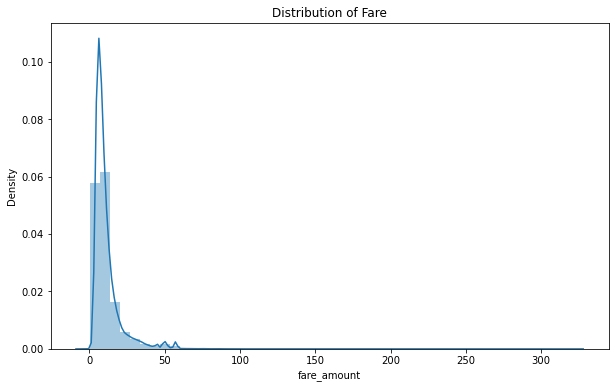

In [90]:
plt.figure(figsize = (10, 6))
sns.distplot(data['fare_amount']);
plt.title('Distribution of Fare');
plt.show()

In [91]:
print(f"there are {len(data[data['fare_amount']<0])} negatives")

there are 8 negatives


In [92]:
print(f"There are {len(data[data['fare_amount'] < 0])} negative fares.")
print(f"There are {len(data[data['fare_amount'] == 0])} $0 fares.") 
print(f"There are {len(data[data['fare_amount'] > 100])} fares greater than $100.")

There are 8 negative fares.
There are 3 $0 fares.
There are 38 fares greater than $100.


In [93]:
(51/100171 )*100

0.05091293887452456

In [94]:
# data33=data[(data["fare_amount"]>=2.5) &(data["fare_amount"]<=100) ]
# data33.shape

In [96]:
data = data[data['fare_amount'].between(left = 2.5, right = 100)] 

In [97]:
data.shape

(100119, 7)

In [98]:
# 100171-100119

In [99]:
data['fare-bin'] = pd.cut(data['fare_amount'], bins = list(range(0, 101, 5)))

In [100]:
data['fare-bin'].value_counts() 

(5, 10]      47039
(10, 15]     19978
(0, 5]       15515
(15, 20]      7353
(20, 25]      3224
             ...  
(75, 80]        29
(80, 85]        22
(85, 90]        18
(95, 100]       10
(90, 95]         9
Name: fare-bin, Length: 20, dtype: int64

Text(0.5, 1.0, 'Fare Binned')

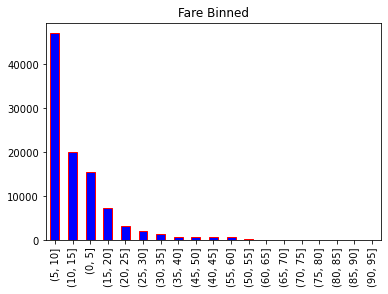

In [101]:
data['fare-bin'] = pd.cut(data['fare_amount'], bins = list(range(0, 100, 5)))
data['fare-bin'].value_counts().plot.bar(color = 'b', edgecolor = 'r');
plt.title('Fare Binned')

### Variable : Passenger_count

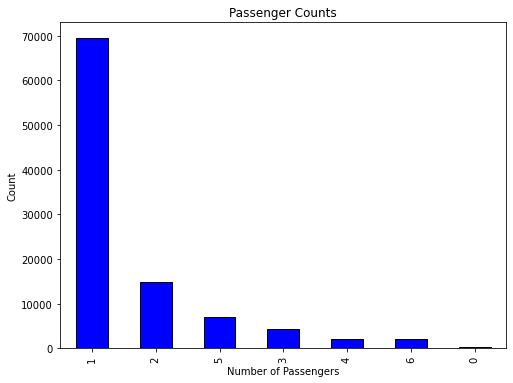

In [102]:
plt.figure(figsize=(8,6))
data['passenger_count'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Passenger Counts'); 
plt.xlabel('Number of Passengers'); 
plt.ylabel('Count');

In [103]:
data["passenger_count"].value_counts()

1    69503
2    14762
5     7082
3     4384
4     2053
6     2009
0      326
Name: passenger_count, dtype: int64

<AxesSubplot:ylabel='passenger_count'>

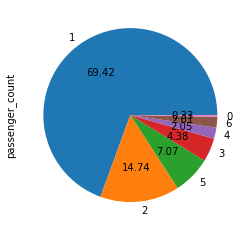

In [104]:
data["passenger_count"].value_counts().plot(kind="pie", autopct="%.2f")

In [105]:
# print(f'Initial Observations: {data.shape[0]}')

In [106]:
data.describe(percentiles=[0.01, .02, .025, .05, 0.1, .95, .96,.97,.975, .98, .99]).T

,count,mean,std,min,1%,2%,2.5%,5%,10%,50%,95%,96%,97%,97.5%,98%,99%,max
fare_amount,100119.00,11.27,9.34,2.50,3.30,3.50,3.70,4.10,4.50,8.50,30.00,33.07,37.80,42.00,45.22,52.00,100.00
pickup_longitude,100119.00,-72.52,10.66,-736.33,-74.01,-74.01,-74.01,-74.01,-74.00,-73.98,-73.87,-73.86,-73.79,-73.78,-73.68,0.00,351.05
pickup_latitude,100119.00,39.95,8.01,-74.02,0.00,40.61,40.64,40.70,40.72,40.75,40.79,40.79,40.79,40.80,40.80,40.81,1669.58
dropoff_longitude,100119.00,-72.51,11.78,-84.65,-74.02,-74.01,-74.01,-74.01,-74.00,-73.98,-73.88,-73.86,-73.81,-73.78,-73.71,0.00,1717.00
dropoff_latitude,100119.00,39.98,10.43,-74.01,0.00,40.59,40.64,40.69,40.71,40.75,40.79,40.80,40.80,40.81,40.81,40.83,1989.73
passenger_count,100119.00,1.68,1.30,0.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,5.00,5.00,5.00,6.00,6.00,6.00


In [107]:
# Absolute difference in latitude and longitude

data['abs_lat_diff'] = (data['dropoff_latitude'] - data['pickup_latitude']).abs()
data['abs_lon_diff'] = (data['dropoff_longitude'] - data['pickup_longitude']).abs()

It does seem that the rides with a larger absolute difference in both longitude and latitude tend to cost more. To capture both differences in a single variable, we can add up the two differences in latitude and longitude and also find the square root of the sum of differences squared. The former feature would be called the Manhattan distance - or l1 norm - and the latter is called the Euclidean distance - or l2 norm. Both of these distances are specific examples of the general Minkowski distance.

###### Manhattan and Euclidean Distance
The Minkowski Distance between two points is expressed as:

D(X,Y)=(∑i=1n|xi−yi|p)1/p

if p = 1, then this is the Manhattan distance and if p = 2 this is the Euclidean distance. You may also see these referred to as the l1 or l2 norm where the number indicates p in the equation.

I should point out that these equations are only valid for actual distances in a cartesian coordinate system and here we only use them to find relative distances. To find the actual distances in terms of kilometers, we have to work with the latitude and longitude geographical coordinate system. This will be done later using the Haversine formula.

In [108]:
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)

In [109]:
# (23,25); (45,35)
minkowski_distance(23,45, 25, 35, 2)

24.166091947189145

In [110]:
minkowski_distance(0, 3, 0, 4, 2) # Euclidean Distance

5.0

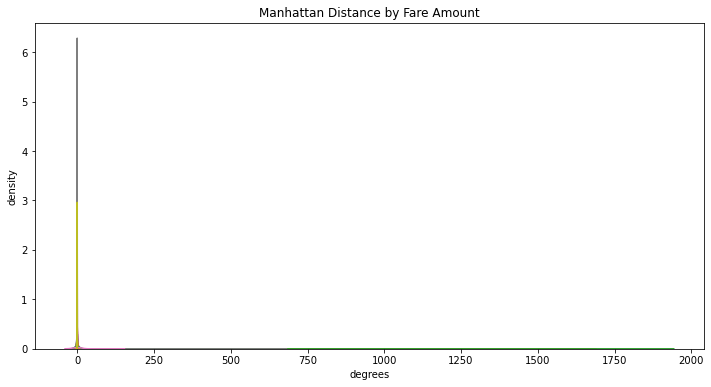

In [111]:
data['manhattan'] = minkowski_distance(data['pickup_longitude'], 
                                       data['dropoff_longitude'],
                                       data['pickup_latitude'],
                                       data['dropoff_latitude'], 1)




# Calculate distribution by each fare bin
plt.figure(figsize = (12, 6))
for f, grouped in data.groupby('fare-bin'):
    sns.kdeplot(grouped['manhattan'], label = f'{f}');

plt.xlabel('degrees'); plt.ylabel('density')
plt.title('Manhattan Distance by Fare Amount');

In [112]:
data[data["manhattan"]>100].shape

(163, 11)

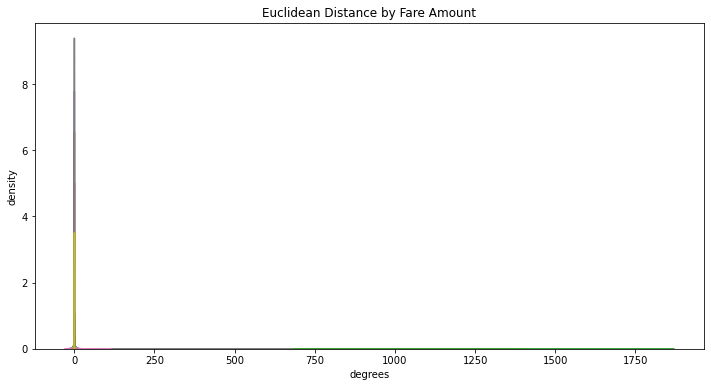

In [113]:
data['euclidean'] = minkowski_distance(data['pickup_longitude'], data['dropoff_longitude'],
                                       data['pickup_latitude'], 
                                       data['dropoff_latitude'], 2)

# Calculate distribution by each fare bin
plt.figure(figsize = (12, 6))
for f, grouped in data.groupby('fare-bin'):
    sns.kdeplot(grouped['euclidean'], label = f'{f}');

plt.xlabel('degrees'); 
plt.ylabel('density')
plt.title('Euclidean Distance by Fare Amount');

In [114]:
data.groupby('fare-bin')['euclidean'].agg(['mean', 'count'])

,mean,count
fare-bin,,
"(0, 5]",0.27,15515
"(5, 10]",0.14,47039
"(10, 15]",0.28,19978
"(15, 20]",0.21,7353
"(20, 25]",0.27,3224
...,...,...
"(70, 75]",0.19,33
"(75, 80]",0.18,29
"(80, 85]",3.98,22


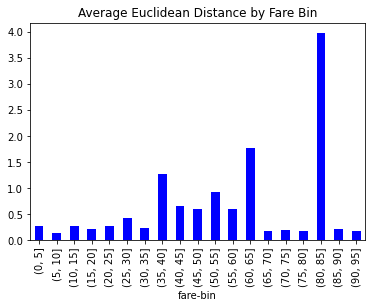

In [115]:
data.groupby('fare-bin')['euclidean'].mean().plot.bar(color = 'b');
plt.title('Average Euclidean Distance by Fare Bin');

There is a very clearly relationship between the fare bin and the average distance of the trip! This should give us confidence that this feature will be useful to a model.

Another plot we can make is the passenger count distribution colored by the fare bin.

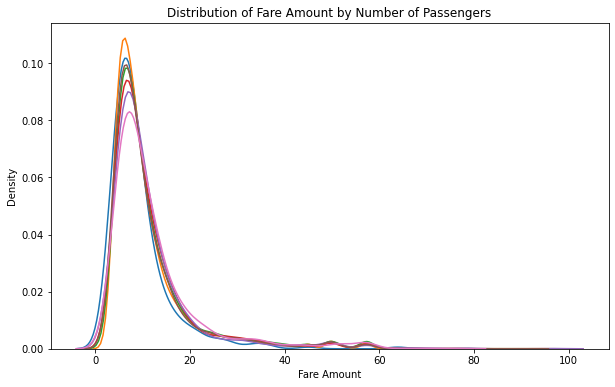

In [116]:
plt.figure(figsize = (10, 6))

for p, grouped in data.groupby('passenger_count'):
    sns.kdeplot(grouped['fare_amount'], label = f'{p} passengers');
    
plt.xlabel('Fare Amount'); plt.ylabel('Density')
plt.title('Distribution of Fare Amount by Number of Passengers');

###### There does not appear to be much difference between the number of passengers. To get a more accurate picture, we can calculate the actual stats.

In [117]:
data.groupby('passenger_count')['fare_amount'].agg(['mean', 'count'])

,mean,count
passenger_count,,
0,9.23,326
1,11.13,69503
2,11.82,14762
3,11.44,4384
4,11.51,2053
5,11.22,7082
6,12.21,2009


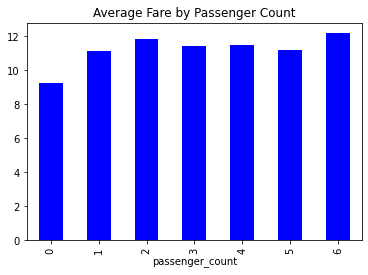

In [118]:
data.groupby('passenger_count')['fare_amount'].mean().plot.bar(color = 'b');
plt.title('Average Fare by Passenger Count');

There is a small but noticeable difference in the average fare by the number of passengers.

In [119]:
data.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'fare-bin',
       'abs_lat_diff', 'abs_lon_diff', 'manhattan', 'euclidean'],
      dtype='object')

In [120]:
y=data["fare_amount"]
X=data[['abs_lat_diff', 'abs_lon_diff', 'manhattan', 'euclidean','passenger_count' ]]

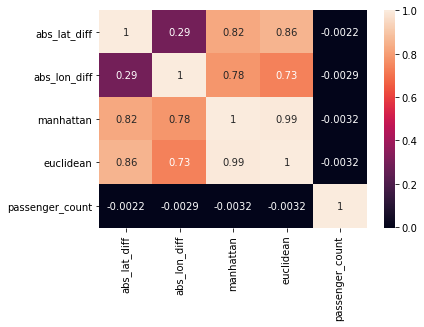

In [121]:
sns.heatmap(X.corr(), annot=True)
plt.show()

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=99)

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest
random_forest = RandomForestRegressor(n_estimators = 100, max_depth = 5, 
                                      bootstrap = True,n_jobs = -1)

# Train on data
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_jobs=-1)

In [125]:
print("R^2 is train: ", random_forest.score(X_train, y_train))
print("R^2 is test: ", random_forest.score(X_test, y_test))

R^2 is train:  0.7901806810837546
R^2 is test:  0.7593149284469086


In [126]:
random_forest.predict(X_train)

array([ 5.55823229, 13.71793015, 14.25241713, ...,  5.55823229,
       10.34365838,  5.55823229])

In [127]:
print("RMSE of Train: ", np.sqrt(np.mean((y_train-random_forest.predict(X_train))**2) ))
print("RMSE of Test: ", np.sqrt(np.mean((y_test-random_forest.predict(X_test))**2) ))

RMSE of Train:  4.276037641105298
RMSE of Test:  4.5943284222254395


In [128]:
print("MAE of Train: ", np.mean(np.abs((y_train-random_forest.predict(X_train))) ))
print("MAE of Test: ", np.mean(np.abs((y_test-random_forest.predict(X_test))) ))

MAE of Train:  2.3308811034362464
MAE of Test:  2.384039850094292


In [129]:
random_forest.feature_importances_

array([5.26718910e-03, 5.20822100e-02, 2.00287884e-02, 9.22498895e-01,
       1.22917298e-04])

In [130]:
X_train.columns

Index(['abs_lat_diff', 'abs_lon_diff', 'manhattan', 'euclidean',
       'passenger_count'],
      dtype='object')

In [131]:
pd.DataFrame({"Var": X_train.columns, "Imp": random_forest.feature_importances_})

,Var,Imp
0,abs_lat_diff,0.01
1,abs_lon_diff,0.05
2,manhattan,0.02
3,euclidean,0.92
4,passenger_count,0.00


In [132]:
print("R^2 is train: ", random_forest.score(X_train, y_train))
print("R^2 is test: ", random_forest.score(X_test, y_test))
print("MAE of Train: ", np.mean(np.abs((y_train-random_forest.predict(X_train))) ))
print("MAE of Test: ", np.mean(np.abs((y_test-random_forest.predict(X_test))) ))
print("RMSE of Train: ", np.sqrt(np.mean((y_train-random_forest.predict(X_train))**2) ))
print("RMSE of Test: ", np.sqrt(np.mean((y_test-random_forest.predict(X_test))**2) ))


R^2 is train:  0.7901806810837546
R^2 is test:  0.7593149284469086
MAE of Train:  2.3308811034362464
MAE of Test:  2.384039850094292
RMSE of Train:  4.276037641105298
RMSE of Test:  4.5943284222254395


In [133]:
from sklearn.tree import DecisionTreeRegressor

In [134]:
m1=DecisionTreeRegressor(max_depth=5)
m1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [135]:
print("R^2 is train: ", m1.score(X_train, y_train))
print("R^2 is test: ", m1.score(X_test, y_test))
print("MAE of Train: ", np.mean(np.abs((y_train-m1.predict(X_train))) ))
print("MAE of Test: ", np.mean(np.abs((y_test-m1.predict(X_test))) ))
print("RMSE of Train: ", np.sqrt(np.mean((y_train-m1.predict(X_train))**2) ))
print("RMSE of Test: ", np.sqrt(np.mean((y_test-m1.predict(X_test))**2) ))

R^2 is train:  0.7861162864082163
R^2 is test:  0.7509941618957612
MAE of Train:  2.3565434630640554
MAE of Test:  2.417408936063363
RMSE of Train:  4.317254402900521
RMSE of Test:  4.67306933672741


In [136]:
data.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'fare-bin',
       'abs_lat_diff', 'abs_lon_diff', 'manhattan', 'euclidean'],
      dtype='object')

In [137]:
data1=data.copy()

In [138]:
data1["day"]=data1["pickup_datetime"].dt.day  # day of month
data1["weekday"]=data1["pickup_datetime"].dt.weekday
data1["month"]=data1["pickup_datetime"].dt.month
data1["hour"]=data1["pickup_datetime"].dt.hour
data1["minute"]=data1["pickup_datetime"].dt.minute
data1 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare-bin,abs_lat_diff,abs_lon_diff,manhattan,euclidean,day,weekday,month,hour,minute
0,4.50,2009-06-15 17:26:21+00:00,-73.84,40.72,-73.84,40.71,1,"(0, 5]",0.01,0.00,0.01,0.01,15,0,6,17,26
1,16.90,2010-01-05 16:52:16+00:00,-74.02,40.71,-73.98,40.78,1,"(15, 20]",0.07,0.04,0.11,0.08,5,1,1,16,52
2,5.70,2011-08-18 00:35:00+00:00,-73.98,40.76,-73.99,40.75,2,"(5, 10]",0.01,0.01,0.02,0.01,18,3,8,0,35
3,7.70,2012-04-21 04:30:42+00:00,-73.99,40.73,-73.99,40.76,1,"(5, 10]",0.02,0.00,0.03,0.03,21,5,4,4,30
4,5.30,2010-03-09 07:51:00+00:00,-73.97,40.77,-73.96,40.78,1,"(5, 10]",0.02,0.01,0.03,0.02,9,1,3,7,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100166,7.00,2014-09-13 17:05:00+00:00,-73.96,40.78,-73.97,40.76,4,"(5, 10]",0.01,0.01,0.03,0.02,13,5,9,17,5
100167,8.90,2012-02-04 18:48:25+00:00,-73.99,40.74,-74.00,40.76,4,"(5, 10]",0.02,0.01,0.02,0.02,4,5,2,18,48
100168,6.90,2012-06-22 19:16:00+00:00,-73.96,40.77,-73.97,40.75,1,"(5, 10]",0.02,0.01,0.03,0.02,22,4,6,19,16
100169,12.00,2014-01-10 19:12:00+00:00,-73.97,40.75,-73.99,40.74,1,"(10, 15]",0.01,0.02,0.02,0.02,10,4,1,19,12


In [139]:
data1["IsMonthStart"]=np.where(data1["day"]<=10, 1,0)
data1["IsMonthEnd"]=np.where(data1["day"]>=20, 1,0)
data1["IsMonthMid"]=np.where((data1["day"]>10) & (data1["day"]<20) , 1,0)

In [140]:
# {0: Mon, 1:Tues, 2:wed, 3:thur, 4: frid, 5:sat, 6 : sun}
fg=pd.DataFrame({"d":["2022-03-08"]})
fg["d"]=pd.to_datetime(fg["d"])
fg["d"].dt.weekday

0    1
Name: d, dtype: int64

In [141]:
data1["isWeekend"]=np.where(data1["weekday"]>4,1,0)  # 1 : weekend , 0: weekdays

In [142]:
data1["q1"]= np.where(data1["month"]<4,1,0)
data1["q2"]= np.where((data1["month"]>=4) &(data1["month"]<7) ,1,0)
data1["q3"]= np.where((data1["month"]>=7) &(data1["month"]<10) ,1,0)
data1["q4"]= np.where(data1["month"]>=10 ,1,0)

In [143]:
data1["EarlyMorning"]=np.where((data1["hour"]>4) & (data1["hour"]<8) , 1,0)
data1["Morning"]=np.where((data1["hour"]>=8) & (data1["hour"]<12) , 1,0)
data1["AftrNoom"]=np.where((data1["hour"]>=12) & (data1["hour"]<16) , 1,0)
data1["Evening"]=np.where((data1["hour"]>=16) & (data1["hour"]<20) , 1,0)
data1["Night"]=np.where((data1["hour"]>=20) & (data1["hour"]<=24) , 1,0)
data1["LateNight"]=np.where((data1["hour"]>=0) & (data1["hour"]<4) , 1,0)

In [144]:
data1.shape

(100119, 31)

In [145]:
data1[["hour" ,"month"]].describe(percentiles=[0.01, 0.03, 0.05, .1, .2,.3,.4,.5,.6,.7,.8,.9, .99]).T

,count,mean,std,min,1%,3%,5%,10%,20%,30%,40%,50%,60%,70%,80%,90%,99%,max
hour,100119.00,13.49,6.51,0.00,0.00,0.00,1.00,3.00,8.00,10.00,12.00,14.00,16.00,18.00,20.00,22.00,23.00,23.00
month,100119.00,6.27,3.45,1.00,1.00,1.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,9.00,10.00,11.00,12.00,12.00


In [146]:
data1.columns 

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'fare-bin',
       'abs_lat_diff', 'abs_lon_diff', 'manhattan', 'euclidean', 'day',
       'weekday', 'month', 'hour', 'minute', 'IsMonthStart', 'IsMonthEnd',
       'IsMonthMid', 'isWeekend', 'q1', 'q2', 'q3', 'q4', 'EarlyMorning',
       'Morning', 'AftrNoom', 'Evening', 'Night', 'LateNight'],
      dtype='object')

In [148]:
x=data1[['abs_lat_diff', 'abs_lon_diff',  'euclidean', 'day',
       'weekday', 'month', 'hour', 'minute', 'IsMonthStart', 'IsMonthEnd',
       'IsMonthMid', 'isWeekend', 'q1', 'q2', 'q3', 'q4', 'EarlyMorning',
       'Morning', 'AftrNoom', 'Evening', 'Night', 'LateNight']]
y=data1['fare_amount']

In [149]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2,random_state=88)

In [150]:
rfl=RandomForestRegressor(random_state=88, min_samples_split=200)

In [151]:
rfl.fit(x_train, y_train) 

RandomForestRegressor(random_state=88)

In [152]:
print("Train R^2", rfl.score(x_train, y_train))
print("Test R^2", rfl.score(x_test, y_test))

Train R^2 0.9677009917135567
Test R^2 0.7816431464680643


In [153]:
print("RMSE of Train: ", np.sqrt(np.mean((y_train-rfl.predict(x_train))**2) ))
print("RMSE of Test: ", np.sqrt(np.mean((y_test-rfl.predict(x_test))**2) ))

RMSE of Train:  1.6750138079787422
RMSE of Test:  4.410545179809818


In [154]:
print("MSE of Train: ", np.mean((y_train-rfl.predict(x_train))**2) )
print("MSE of Test: ", np.mean((y_test-rfl.predict(x_test))**2) )

MSE of Train:  2.8056712569194464
MSE of Test:  19.452908783143616


In [155]:
pd.DataFrame({"Var": x_train.columns, "Imp":rfl.feature_importances_}).sort_values(by=["Imp"], ascending=False)

,Var,Imp
2,euclidean,0.80
1,abs_lon_diff,0.03
0,abs_lat_diff,0.03
7,minute,0.03
3,day,0.02
...,...,...
15,q4,0.00
8,IsMonthStart,0.00
9,IsMonthEnd,0.00
20,Night,0.00
